**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**


---

# Performing logistic regression to get cell type predictions using the MFI reference built

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata
import os
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import pickle

In [2]:
np.random.seed(0)

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

-----
anndata     0.7.6
scanpy      1.7.0
sinfo       0.3.1
-----
PIL                 8.3.0
anndata             0.7.6
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.1
certifi             2021.05.30
cffi                1.14.4
chardet             4.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
debugpy             1.3.0
decorator           5.0.9
defusedxml          0.7.1
dunamai             1.5.5
get_version         3.2
google              NA
h5py                3.3.0
idna                2.10
igraph              0.8.3
ipykernel           6.0.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              3.0.1
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.9.0
jupyterlab_server   2.6.0
kiwisolver  

In [4]:
save_path= '../results/log_regression/'

In [5]:
adata_MFIRef = sc.read('../data/adata_raw_MFIdata_annotated.h5ad')

In [6]:
#reading original object with raw counts
#adata_MFIRef=sc.read('../../placental_explant/starsolo/results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_Raw_20220523.h5ad')

adata_MFIRef.obs

,n_genes,sample,technology,tissue,dev_age,donor,dataset,run,number_of_individuals_multiplexed,batch,percent_mito,n_counts,scrublet_score,scrublet_cluster_score,bh_pval,is_doublet,cell_type
barcode_sample,,,,,,,,,,,,,,,,,
AAACGGGCATTGGCGC-1_FCA7167219,1941,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.090287,5992.0,0.164948,0.112619,0.857143,False,dNK1
AAACGGGTCGCGATCG-1_FCA7167219,1246,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.010213,3525.0,0.050251,0.069505,0.905171,False,dT_cells
AAAGATGAGCAATATG-1_FCA7167219,1516,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.020889,4452.0,0.096774,0.087838,0.905171,False,T_cells
AAAGATGAGTTCGCGC-1_FCA7167219,2099,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.047764,6888.0,0.096774,0.112619,0.857143,False,dNK1
AAAGATGCATGTCGAT-1_FCA7167219,1636,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.024991,5882.0,0.087838,0.072727,0.905171,False,T_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGTCAAGT-1_Pla_Camb10714920,2409,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.007270,5227.0,0.013699,0.014381,0.999631,False,uSMC
TTTGTGTTCTTAGTCT-1_Pla_Camb10714920,4129,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.002532,17379.0,0.102190,0.125000,0.886380,False,SCT
TTTGTTGGTCACAGCG-1_Pla_Camb10714920,3116,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.004499,7779.0,0.036876,0.038067,0.999631,False,HOFB


In [7]:
adata_MFIRef.raw

In [8]:
# my test data
adata_explants = sc.read('../results/scVI/rna3_scVIintegrated_All_latent30.h5ad')
adata_explants.X = adata_explants.layers['raw_counts'].copy() #Setting the raw_counts in .X

In [9]:
adata_explants

AnnData object with n_obs × n_vars = 217256 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'leiden', 'leiden_scvi_colors', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
  

# LOGISTIC REGRESSION

### Subsetting both datasets' copies to common genes only

Can be either overlap of all genes that passed QC or HVG overlap

In [10]:
adata_MFIRef.var

,gene_ids-0,feature_types-0,genome-0,n_cells-0,gene_ids-1,feature_types-1,genome-1,n_cells-1,gene_ids-10,feature_types-10,...,genome-7,n_cells-7,gene_ids-8,feature_types-8,genome-8,n_cells-8,gene_ids-9,feature_types-9,genome-9,n_cells-9
A1BG,ENSG00000121410,Gene Expression,GRCh38,58.0,ENSG00000121410,Gene Expression,GRCh38,118.0,ENSG00000121410,Gene Expression,...,GRCh38,140.0,ENSG00000121410,Gene Expression,GRCh38,185.0,ENSG00000121410,Gene Expression,GRCh38,608.0
A1BG-AS1,ENSG00000268895,Gene Expression,GRCh38,7.0,ENSG00000268895,Gene Expression,GRCh38,21.0,ENSG00000268895,Gene Expression,...,GRCh38,14.0,ENSG00000268895,Gene Expression,GRCh38,20.0,ENSG00000268895,Gene Expression,GRCh38,91.0
A1CF,nan,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,...,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,NaN
A2M,ENSG00000175899,Gene Expression,GRCh38,66.0,ENSG00000175899,Gene Expression,GRCh38,171.0,ENSG00000175899,Gene Expression,...,nan,NaN,ENSG00000175899,Gene Expression,GRCh38,5.0,ENSG00000175899,Gene Expression,GRCh38,2117.0
A2M-AS1,ENSG00000245105,Gene Expression,GRCh38,6.0,ENSG00000245105,Gene Expression,GRCh38,5.0,ENSG00000245105,Gene Expression,...,GRCh38,59.0,ENSG00000245105,Gene Expression,GRCh38,61.0,ENSG00000245105,Gene Expression,GRCh38,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,ENSG00000070476,Gene Expression,GRCh38,11.0,ENSG00000070476,Gene Expression,GRCh38,21.0,ENSG00000070476,Gene Expression,...,GRCh38,26.0,ENSG00000070476,Gene Expression,GRCh38,32.0,ENSG00000070476,Gene Expression,GRCh38,122.0
ZYG11A,nan,nan,nan,NaN,nan,nan,nan,NaN,nan,nan,...,nan,NaN,nan,nan,nan,NaN,nan,nan,nan,NaN
ZYG11B,ENSG00000162378,Gene Expression,GRCh38,15.0,ENSG00000162378,Gene Expression,GRCh38,41.0,ENSG00000162378,Gene Expression,...,GRCh38,22.0,ENSG00000162378,Gene Expression,GRCh38,47.0,ENSG00000162378,Gene Expression,GRCh38,183.0
ZYX,ENSG00000159840,Gene Expression,GRCh38,134.0,ENSG00000159840,Gene Expression,GRCh38,284.0,ENSG00000159840,Gene Expression,...,GRCh38,265.0,ENSG00000159840,Gene Expression,GRCh38,319.0,ENSG00000159840,Gene Expression,GRCh38,2351.0


### Calculating highly variable genes
Raw counts needed at this step

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
/opt/conda/envs/scvi-singularity/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


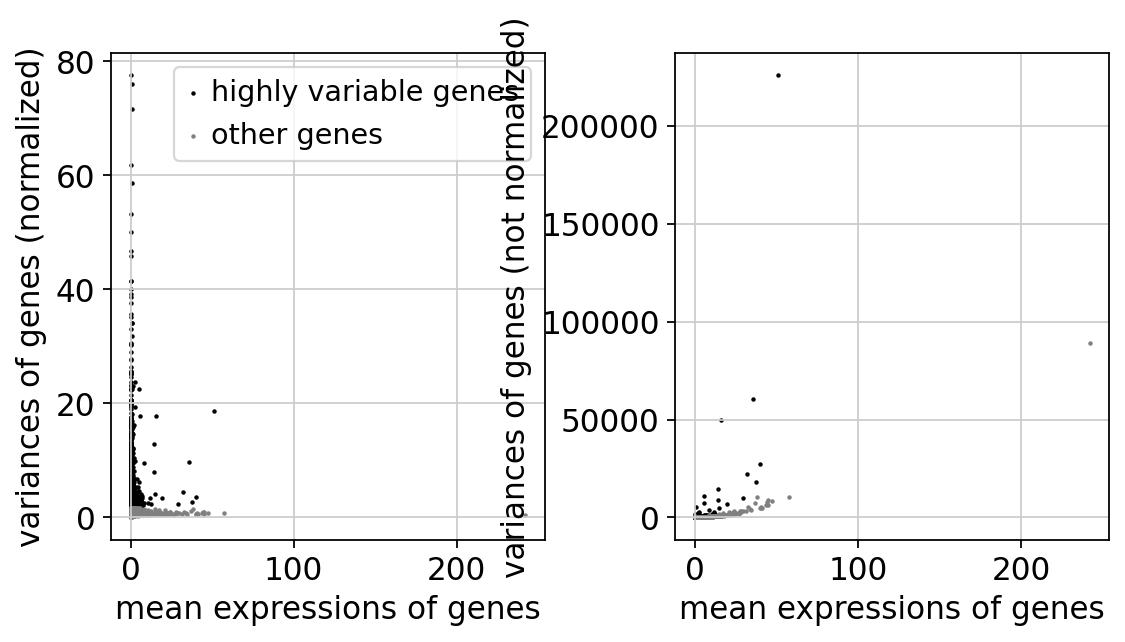

Total number of cells: 325665
Total number of genes: 3000


In [11]:
### Reference


sc.pp.highly_variable_genes(adata_MFIRef, n_top_genes=3000, flavor='seurat_v3')
sc.pl.highly_variable_genes(adata_MFIRef)

#saving the highl variable genes
highly_variable_genes = adata_MFIRef.var["highly_variable"]
#Subsetting the object to contain only the HVGs
adata_MFIRef_downsampled = adata_MFIRef[:, highly_variable_genes]

print('Total number of cells: {:d}'.format(adata_MFIRef_downsampled.n_obs))
print('Total number of genes: {:d}'.format(adata_MFIRef_downsampled.n_vars))

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


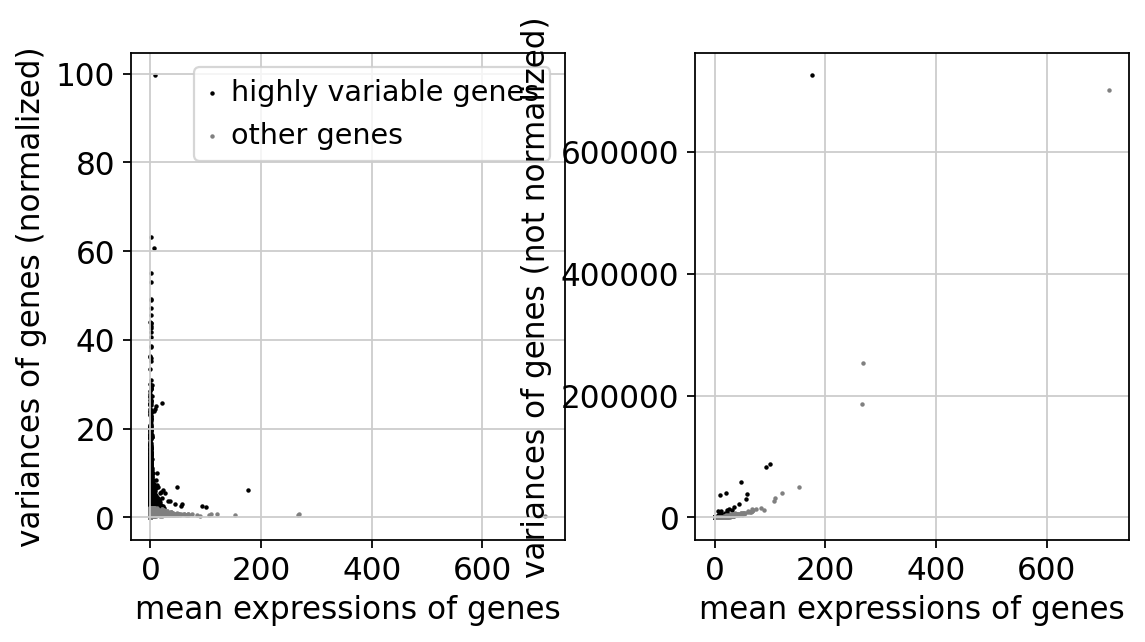

Total number of cells: 217256
Total number of genes: 3000


In [13]:
### Explants


sc.pp.highly_variable_genes(adata_explants, n_top_genes=3000, flavor='seurat_v3')
sc.pl.highly_variable_genes(adata_explants)

#saving the highl variable genes
highly_variable_genes = adata_explants.var["highly_variable"]
#Subsetting the object to contain only the HVGs
adata_hvg = adata_explants[:, highly_variable_genes]

print('Total number of cells: {:d}'.format(adata_hvg.n_obs))
print('Total number of genes: {:d}'.format(adata_hvg.n_vars))

In [14]:
adata_hvg

View of AnnData object with n_obs × n_vars = 217256 × 3000
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi', 'donor_id_colors', 'hpi_colors', 'hvg', 'infection_colors', 'leiden', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_scVI_n_latent_20', 'X_scVI_n_latent_30', 'X_scVI_n_latent_40', 'X_umap', '_scvi_extra_categoricals'
    layers: 'raw_

In [15]:
### here using only HVG overlap
###

# normlog, scaled and HVG subsetted 
adata_train = adata_MFIRef_downsampled.copy()

# normlog, scaled and HVG subsetted 
adata_test = adata_hvg.copy()

In [16]:
del(adata_hvg)
del(adata_MFIRef_downsampled)

### Normlog and scaling Training and Test sets

In [17]:
#normlog and scaling Training and Test sets
sc.pp.normalize_total(adata_train, target_sum=1e4)
sc.pp.log1p(adata_train)
sc.pp.scale(adata_train, max_value=10)


sc.pp.normalize_total(adata_test, target_sum=1e4)
sc.pp.log1p(adata_test)
sc.pp.scale(adata_test, max_value=10)

normalizing counts per cell
    finished (0:00:01)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [18]:
# list of genes shared between blood and bone marrow data
# doing sorted on the overall list is VERY important for consistent ordering of the genes
common_genes = sorted(list(set(adata_train.var_names) & set(adata_test.var_names)))
print(len(common_genes),"genes are shared between annotated train and our joint data \n",
      len(set(adata_train.var_names)), 'genes in training data \n',
      len((set(adata_test.var_names))), 'genes in test joint data \n')

1490 genes are shared between annotated train and our joint data 
 3000 genes in training data 
 3000 genes in test joint data 



In [19]:
#Subseting the datasets
adata_train_copy = adata_train[:,common_genes]
adata_train_copy.var_names

Index(['AADACL2-AS1', 'ABCA7', 'ABCB1', 'ABI3BP', 'ABTB2', 'AC003092.1',
       'AC004053.1', 'AC004704.1', 'AC004862.1', 'AC008250.1',
       ...
       'ZEB1', 'ZFAT', 'ZNF365', 'ZNF385D', 'ZNF521', 'ZNF804A', 'ZNRF3',
       'ZPBP', 'ZPLD1', 'ZWINT'],
      dtype='object', length=1490)

In [20]:
#Subseting the datasets
adata_test_copy = adata_test[:,common_genes]
adata_test_copy.var_names

Index(['AADACL2-AS1', 'ABCA7', 'ABCB1', 'ABI3BP', 'ABTB2', 'AC003092.1',
       'AC004053.1', 'AC004704.1', 'AC004862.1', 'AC008250.1',
       ...
       'ZEB1', 'ZFAT', 'ZNF365', 'ZNF385D', 'ZNF521', 'ZNF804A', 'ZNRF3',
       'ZPBP', 'ZPLD1', 'ZWINT'],
      dtype='object', length=1490)

In [21]:
# checking gene correspondence - important!
list(adata_test_copy.var_names) == list(adata_train_copy.var_names)

True

In [22]:
adata_train_copy.obs

,n_genes,sample,technology,tissue,dev_age,donor,dataset,run,number_of_individuals_multiplexed,batch,percent_mito,n_counts,scrublet_score,scrublet_cluster_score,bh_pval,is_doublet,cell_type
barcode_sample,,,,,,,,,,,,,,,,,
AAACGGGCATTGGCGC-1_FCA7167219,1941,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.090287,5992.0,0.164948,0.112619,0.857143,False,dNK1
AAACGGGTCGCGATCG-1_FCA7167219,1246,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.010213,3525.0,0.050251,0.069505,0.905171,False,dT_cells
AAAGATGAGCAATATG-1_FCA7167219,1516,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.020889,4452.0,0.096774,0.087838,0.905171,False,T_cells
AAAGATGAGTTCGCGC-1_FCA7167219,2099,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.047764,6888.0,0.096774,0.112619,0.857143,False,dNK1
AAAGATGCATGTCGAT-1_FCA7167219,1636,FCA7167219,10X_3'_scRNA-seq,decidua_immune,13_PCW,6,Vento_Nature,NaN,1,0,0.024991,5882.0,0.087838,0.072727,0.905171,False,T_cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGTCAAGT-1_Pla_Camb10714920,2409,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.007270,5227.0,0.013699,0.014381,0.999631,False,uSMC
TTTGTGTTCTTAGTCT-1_Pla_Camb10714920,4129,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.002532,17379.0,0.102190,0.125000,0.886380,False,SCT
TTTGTTGGTCACAGCG-1_Pla_Camb10714920,3116,Pla_Camb10714920,10X_multiome,decidua_placenta_myometrium,8-9_PCW,P13,Ashley_collection_sn,NaN,1,61,0.004499,7779.0,0.036876,0.038067,0.999631,False,HOFB


In [23]:
np.unique(adata_train_copy.obs['cell_type'],return_counts=True)

(array(['B_cells', 'DC', 'EVT_1', 'EVT_2', 'Endo_F', 'Endo_L', 'Endo_M',
        'GC', 'Granulocytes', 'HOFB', 'ILC3', 'M3', 'MO', 'NK', 'PV AOC3',
        'PV MMP11', 'PV STEAP4', 'Plasma', 'SCT', 'T_cells', 'VCT',
        'VCT_CCC', 'VCT_fusing', 'VCT_p', 'dDC', 'dEpi_lumenal',
        'dEpi_secretory', 'dM1', 'dM2', 'dNK1', 'dNK2', 'dNK3', 'dS1',
        'dS2', 'dS3', 'dT_cells', 'dT_regs', 'eEVT', 'fF1', 'fF2', 'iEVT',
        'uSMC'], dtype=object),
 array([  774,   697,  5289,  2358,  1466,  1761,  6877,    19,   195,
        10733,  2511,  1299,  3050,  5187,   569,  1163,  1036,   255,
        28177,  2126, 23472,  3373,  1971,  6679,   694,   135, 16834,
        14099,  9221, 10450, 12487,  2952, 31827, 58760, 13004,  9740,
         1862,    28, 10420,  1396,  3676, 17043]))

# Training a logistic regression model on previously annotated 10X data Arutyunyan, et al. 2023

In [24]:
adata_train_copy.obs['cell_type'].head()

barcode_sample
AAACGGGCATTGGCGC-1_FCA7167219        dNK1
AAACGGGTCGCGATCG-1_FCA7167219    dT_cells
AAAGATGAGCAATATG-1_FCA7167219     T_cells
AAAGATGAGTTCGCGC-1_FCA7167219        dNK1
AAAGATGCATGTCGAT-1_FCA7167219     T_cells
Name: cell_type, dtype: category
Categories (42, object): ['B_cells', 'DC', 'EVT_1', 'EVT_2', ..., 'fF1', 'fF2', 'iEVT', 'uSMC']

In [25]:
celltypes_train = adata_train_copy.obs['cell_type']

In [26]:
adata_train_copy.X.shape

(325665, 1490)

## The following cell actually trains the model and may require quite a bit of time if you are using a big training dataset

In [ ]:
#11:23
%time
# training a logistic regression model on scRNA-seq data
# takes about 1.5hrs for HVGs intersection
logisticRegr_sc = LogisticRegression(max_iter = 5000, n_jobs = -1, random_state = 0, C=0.2)
logisticRegr_sc.fit(adata_train_copy.X, celltypes_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [ ]:
# Saving model
pkl_filename = "../results/log_regression/logreg_MFIref_InfectedExplants_HVGs_20230707.pkl"



with open(pkl_filename, 'wb') as file:  
    pickle.dump(logisticRegr_sc, file)

In [ ]:
print('YAY')

In [ ]:
logisticRegr_sc

In [ ]:
%%time
predictions = logisticRegr_sc.predict(adata_test_copy.X)
adata_test_copy.obs['celltype_predictions'] = predictions

In [ ]:
%%time
# probabilities
probabilities = logisticRegr_sc.predict_proba(adata_test_copy.X)
probs_adata = []
for i,clus in enumerate(adata_test_copy.obs['celltype_predictions']):
    probs_adata.append(probabilities[i,logisticRegr_sc.classes_==clus][0])



In [ ]:
#list(adata_test_copy.obs.index) == list(adata_hvg.obs.index)

In [ ]:
adata_test_copy.obs['celltype_predictions']

In [ ]:
# now you can return to your object transferring celltype predictions and their probabilities from training

# my test object
adata_explants.obs['celltype_predictions'] = adata_test_copy.obs.loc[adata_explants.obs_names,'celltype_predictions']
adata_explants.obs['probabilities'] = probs_adata

In [ ]:
# you may want to save results at this point
adata_explants.obs.loc[:,['celltype_predictions','probabilities']].to_csv('../results/log_regression/logreg_MFIref_InfectedExplants_HVGs_20230707.csv')
